# LOGISTIC REGRESSION

## AGENDA
1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Compare logistic regression with other models

## PART 1: PREDICTING A CATEGORICAL RESPONSE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# glass identification dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


## PART 2: USING LOGISTIC REGRESSION

In [3]:
# Logistic regression can do what we just did:
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [5]:
LogisticRegression?

In [6]:
glass.shape

(214, 11)

In [7]:
# print the class predictions
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [9]:
# add predicted class to DataFrame
glass['assorted_pred_class'] = assorted_pred_class

In [10]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted,assorted_pred_class
id,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0


In [12]:
# sort DataFrame by al
glass.sort_values('al', inplace=True)

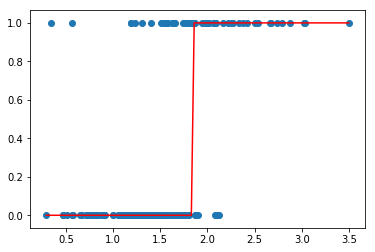

In [13]:
# plot the class predictions again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

### What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [14]:
logreg.predict_proba(X)

array([[9.57512963e-01, 4.24870368e-02],
       [8.83729869e-01, 1.16270131e-01],
       [7.81727605e-01, 2.18272395e-01],
       [9.10590269e-01, 8.94097310e-02],
       [9.26210406e-01, 7.37895944e-02],
       [7.19368281e-01, 2.80631719e-01],
       [9.50165283e-01, 4.98347166e-02],
       [9.65248419e-01, 3.47515807e-02],
       [8.79365064e-01, 1.20634936e-01],
       [8.83729869e-01, 1.16270131e-01],
       [7.67126168e-01, 2.32873832e-01],
       [9.17167650e-01, 8.28323504e-02],
       [8.65415687e-01, 1.34584313e-01],
       [9.17167650e-01, 8.28323504e-02],
       [9.03545531e-01, 9.64544686e-02],
       [9.29017074e-01, 7.09829263e-02],
       [9.46053995e-01, 5.39460046e-02],
       [9.81890179e-01, 1.81098214e-02],
       [9.41624370e-01, 5.83756296e-02],
       [6.56717894e-01, 3.43282106e-01],
       [8.15293899e-01, 1.84706101e-01],
       [9.98500716e-01, 1.49928375e-03],
       [9.10590269e-01, 8.94097310e-02],
       [8.87956869e-01, 1.12043131e-01],
       [9.481481

In [15]:
# store the predicted probabilites of class 1
assorted_pred_prob = logreg.predict_proba(X)[:, 1]

In [16]:
assorted_pred_prob

array([0.04248704, 0.11627013, 0.2182724 , 0.08940973, 0.07378959,
       0.28063172, 0.04983472, 0.03475158, 0.12063494, 0.11627013,
       0.23287383, 0.08283235, 0.13458431, 0.08283235, 0.09645447,
       0.07098293, 0.053946  , 0.01810982, 0.05837563, 0.34328211,
       0.1847061 , 0.00149928, 0.08940973, 0.11204313, 0.05185185,
       0.06566335, 0.13952809, 0.10399088, 0.14987179, 0.08606414,
       0.09287216, 0.04983472, 0.07098293, 0.12514039, 0.10795103,
       0.06566335, 0.1001597 , 0.11204313, 0.0031765 , 0.0031765 ,
       0.04602151, 0.0631447 , 0.10399088, 0.00898037, 0.06071638,
       0.11204313, 0.05837563, 0.00861586, 0.01199657, 0.07098293,
       0.00375248, 0.08606414, 0.06071638, 0.08606414, 0.08940973,
       0.08940973, 0.04602151, 0.08940973, 0.05611973, 0.06071638,
       0.04422061, 0.1001597 , 0.01738125, 0.01151106, 0.01886834,
       0.04602151, 0.01668149, 0.01668149, 0.01886834, 0.01357773,
       0.3918168 , 0.08283235, 0.20434261, 0.24042508, 0.21827

In [17]:
glass['assorted_pred_prob'] = sorted(assorted_pred_prob)

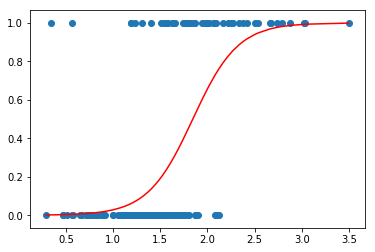

In [18]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_prob, color='red')

In [20]:
# examine some example predictions
print (logreg.predict([[1]]))
print (logreg.predict([[2]]))
print (logreg.predict([[3]]))

[0]
[1]
[1]


In [19]:
# examine some example predictions
print (logreg.predict_proba([[1]]))
print (logreg.predict_proba([[2]]))
print (logreg.predict_proba([[3]]))

[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]


#### What is this? 
* The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## PART 3: PROBABILITY, ODDS, e, LOG, LOG-ODDS



## LOGISTIC REGRESSION ANALYSIS: UNDERSTANDING ODDS AND PROBABILITY

Probability and odds measure the same thing: **the likelihood of a specific outcome**.

People use the terms odds and probability interchangeably in casual usage, but that is unfortunate. It just creates confusion because they are not equivalent.

They measure the same thing on different scales. Imagine how confusing it would be if people used degrees Celsius and degrees Fahrenheit interchangeably. “It’s going to be 35 degrees today” could really make you dress the wrong way.

In measuring the likelihood of any outcome, we need to know two things: how many times something happened and how many times it could have happened, or equivalently, how many times it didn’t. The outcome of interest is called a success, whether it’s a good outcome or not.

The other outcome is a failure. Each time one of the outcomes could occur is called a trial. Since each trial must end in success or failure, number of successes and number of failures adds up to total number of trials.

Probability is the number of times success occurred compared to the total number of trials.

Odds are the number of times success occurred compared to the number of times failure occurred.

For example, to predict the likelihood of accidents at a particular intersection, each car that goes through the intersection is considered a trial. Each trial has one of two outcomes: accident or safe passage. If the outcome we’re most interested in modeling is an accident, that is a success (no matter how morbid it sounds).

**Probability(success)** = number of successes/total number of trials

**Odds(success)** = number of successes/number of failures

Odds are often written as:

    `Number of successes:1 failure`

    which is read as the number of successes for every 1 failure. But often the :1 is dropped.

You will see a lot of researchers get stuck when learning logistic regression because they are not used to thinking of likelihood on an odds scale.

- Equal odds are 1. 1 success for every 1 failure. 1:1
- Equal probabilities are .5. 1 success for every 2 trials.


- Odds can range from 0 to infinity. 
- Odds greater than 1 indicates success is more likely than failure. 
- Odds less than 1 indicates failure is more likely than success.


- Probability can range from 0 to 1. 
- Probability greater than .5 indicates success is more likely than failure. 
- Probability less than .5 indicates failure is more likely than success.


#### THE EXAMPLE: 

In the last month, data from a particular intersection indicate that of the 1,354 cars that drove through it, 72 got into an accident.

- 72 Successes = Accident
- 1282 Failures = Safe Passage (1,354 – 72)


- Failures = Total – Successes


- Pr(Accident) = 72/1354 = .053
- Pr(Safe Passage) = 1282/1354 = .947


- Odds(Accident) = 72/1282 = .056
- Odds(Safety) = 1282/72 = 17.87


Now get out your calculator, because you’ll see how these relate to each other.

- Odds(Accident) = Pr(Accident)/Pr(Safety) = .053/.947

# $$probability = \frac {one\ outcome} {all\ outcomes}$$
# $$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

#### Examples:
- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

# $$odds = \frac {probability} {1 - probability}$$
# $$probability = \frac {odds} {1 + odds}$$

In [21]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


#### What is **e**? It is the base rate of growth shared by all continually growing processes:

In [22]:
# exponential function: e^1
np.exp(1)

2.718281828459045

#### What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [23]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.999896315728952

* It is also the **inverse** of the exponential function:

In [24]:
np.log(np.exp(1))

1.0

In [25]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## PART 4: WHAT IS LOGISTIC REGRESSION?

### **Linear regression:** continuous response is modeled as a linear combination of the features:
# $$y = \beta_0 + \beta_1x$$

### **Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
# $$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

* This is called the **logit function**.

#### Probability is sometimes written as pi:
# $$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

#### The equation can be rearranged into the **logistic function**:
# $$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

#### In other words:
- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

#### The **logistic function** has some nice properties:
- Takes on an "s" shape
- Output is bounded by 0 and 1

#### Notes:
- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

## PART 5: COMPARING LOGISTIC REGRESSION WITH OTHER OTHER MODELS

### Advantages of logistic regression:
- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

### Disadvantages of logistic regression:
- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

# REFERENCES

1. [Explaining Logistic Regression](http://www.theanalysisfactor.com/explaining-logistic-regression/)
2. [Why use Odds Rations](http://www.theanalysisfactor.com/why-use-odds-ratios/)
3. [The Intuitive Guide to Exponential Functions & e](https://betterexplained.com/articles/an-intuitive-guide-to-exponential-functions-e/)
4. [Demystifying the Natural Logarithm](https://betterexplained.com/articles/demystifying-the-natural-logarithm-ln/)